In [1]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
import graphviz # tree 시각화
from sklearn.metrics import f1_score# 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/LGaimers/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/LGaimers/test.csv')

In [3]:
print(train_df.shape)
print(test_df.shape)

(598, 2881)
(310, 2879)


# 전처리

In [4]:
col_list = train_df.columns
nan_list = []
nan_cnt = []
nan_col = []
full_list = []
for col in col_list:
    if train_df[col].isnull().sum() == 0 :
        full_list.append(col)
        continue
    nan_list.append([col, train_df[col].isnull().sum()])
    nan_cnt.append(train_df[col].isnull().sum())
    nan_col.append(col)

In [5]:
'''모든값이 결측값이면 제거'''

del_col = []
for col in nan_list :
    if col[1] == 598 :
        del_col.append(col[0])
train_df = train_df.drop(columns=del_col)
test_df = test_df.drop(columns=del_col)
print(train_df.shape, test_df.shape)

(598, 2799) (310, 2797)


In [6]:
train_T050304 = train_df[train_df['LINE'] == 'T050304']
train_T050307 = train_df[train_df['LINE'] == 'T050307']
train_T100304 = train_df[train_df['LINE'] == 'T100304']
train_T100306 = train_df[train_df['LINE'] == 'T100306']
train_T010306 = train_df[train_df['LINE'] == 'T010306']
train_T010305 = train_df[train_df['LINE'] == 'T010305']

In [7]:
test_T050304 = test_df[test_df['LINE'] == 'T050304']
test_T050307 = test_df[test_df['LINE'] == 'T050307']
test_T100304 = test_df[test_df['LINE'] == 'T100304']
test_T100306 = test_df[test_df['LINE'] == 'T100306']
test_T010306 = test_df[test_df['LINE'] == 'T010306']
test_T010305 = test_df[test_df['LINE'] == 'T010305']

In [8]:
def remove_all_nan(dataframe):
  col_list = dataframe.columns
  nan_list = []
  nan_cnt = []
  nan_col = []
  full_list = []

  for col in col_list:
    if dataframe[col].isnull().sum() == 0:
      full_list.append(col)
      continue
    nan_list.append([col,dataframe[col].isnull().sum()])
    nan_cnt.append(dataframe[col].isnull().sum())
    nan_col.append(col)

  del_col = []
  for nan in nan_list:
    if nan[1] == len(dataframe):
      del_col.append(nan[0])
  
  return dataframe.drop(columns=del_col)

In [9]:
train_T050304.shape

(78, 2799)

In [10]:
train_T050304 = remove_all_nan(train_T050304)
train_T050307 = remove_all_nan(train_T050307)
train_T100304 = remove_all_nan(train_T100304)
train_T100306 = remove_all_nan(train_T100306)
train_T010306 = remove_all_nan(train_T010306)
train_T010305 = remove_all_nan(train_T010305)

In [11]:
train_T100304

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_924,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933
22,TRAIN_022,0,0.517719,2022-06-14 8:53,T100304,T_31,2.0,102.0,0.0,45.0,...,172.5,162.8,157.235484,150.9,326.0,309.290909,290.0,13.7,13.443333,13.2
23,TRAIN_023,0,0.519090,2022-06-14 9:01,T100304,T_31,2.0,102.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,TRAIN_025,1,0.529362,2022-06-19 9:11,T100304,T_31,2.0,97.0,0.0,45.0,...,177.8,157.1,154.074194,150.9,327.0,310.854546,298.0,13.7,13.454839,13.2
29,TRAIN_029,1,0.532405,2022-06-19 23:31,T100304,T_31,2.0,100.0,0.0,45.0,...,177.9,161.3,156.038710,149.1,327.0,312.109091,298.0,13.7,13.422581,13.2
37,TRAIN_037,1,0.533110,2022-06-22 3:47,T100304,T_31,2.0,100.0,0.0,45.0,...,182.8,162.9,155.829032,148.4,327.0,312.254546,298.0,13.7,13.456667,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,TRAIN_561,0,0.522148,2022-09-02 18:15,T100304,T_31,2.0,98.0,0.0,45.0,...,164.1,162.6,156.932258,151.1,317.0,303.527273,289.0,13.7,13.470000,13.3
569,TRAIN_569,1,0.530533,2022-09-03 18:32,T100304,O_31,4.0,98.0,0.0,45.0,...,181.7,160.0,155.541935,149.8,327.0,312.018182,298.0,13.6,13.458065,13.3
571,TRAIN_571,1,0.525916,2022-09-03 18:48,T100304,O_31,4.0,100.0,0.0,45.0,...,175.4,165.7,159.864516,148.7,326.0,311.763636,298.0,13.7,13.425806,13.2
592,TRAIN_592,1,0.528349,2022-09-08 14:22,T100304,T_31,2.0,98.0,0.0,45.0,...,171.5,156.6,152.535484,147.6,326.0,312.472727,298.0,13.6,13.361290,13.2


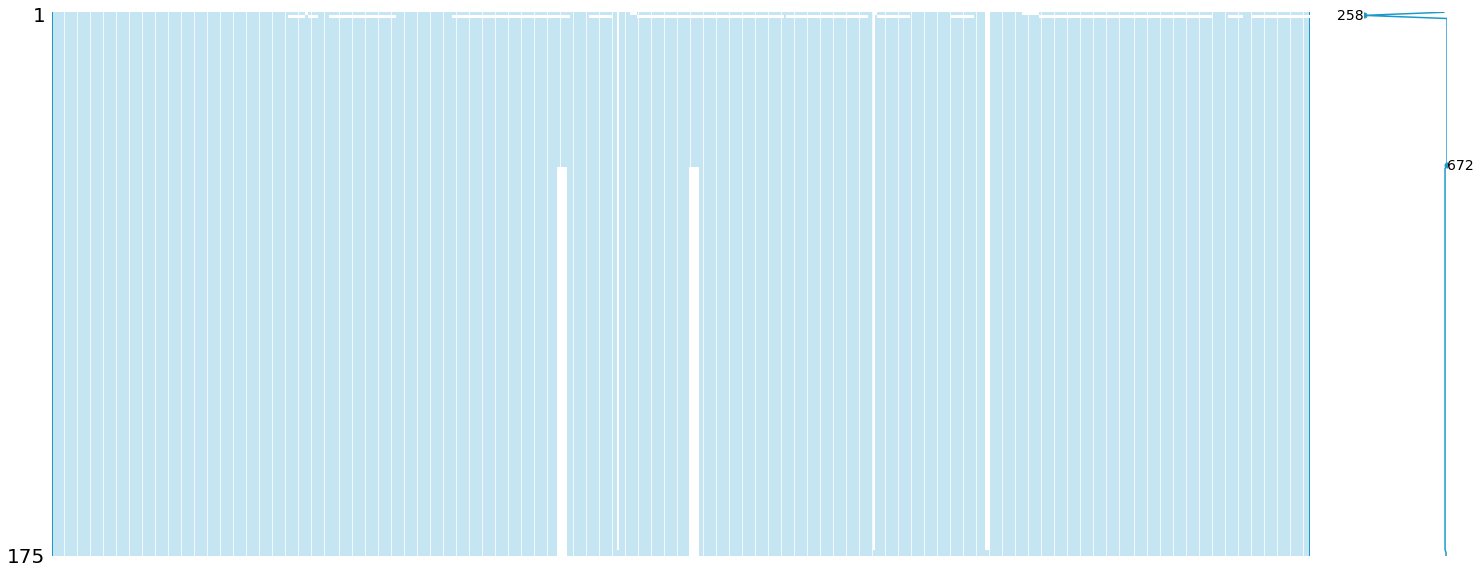

In [12]:
import missingno as msno

msno.matrix(train_T100304.iloc[:,:], color=(0.1, 0.6, 0.8))

In [13]:
# test_T050304 = remove_all_nan(test_T050304)
# test_T050307 = remove_all_nan(test_T050307)
# test_T100304 = remove_all_nan(test_T100304)
# test_T100306 = remove_all_nan(test_T100306)
# test_T010306 = remove_all_nan(test_T010306)
# test_T010305 = remove_all_nan(test_T010305)

In [14]:
train_T050304 = train_T050304.fillna(train_T050304.mean())
train_T050307 = train_T050307.fillna(train_T050307.mean())
train_T100304 = train_T100304.fillna(train_T100304.mean())
train_T100306 = train_T100306.fillna(train_T100306.mean())
train_T010306 = train_T010306.fillna(train_T010306.mean())
train_T010305 = train_T010305.fillna(train_T010305.mean())

test_T050304 = test_T050304.fillna(test_T050304.mean())
test_T050307 = test_T050307.fillna(test_T050307.mean())
test_T100304 = test_T100304.fillna(test_T100304.mean())
test_T100306 = test_T100306.fillna(test_T100306.mean())
test_T010306 = test_T010306.fillna(test_T010306.mean())
test_T010305 = test_T010305.fillna(test_T010305.mean())

<ipython-input-14-ffb6462d2fad>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_T050304 = train_T050304.fillna(train_T050304.mean())
<ipython-input-14-ffb6462d2fad>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_T050307 = train_T050307.fillna(train_T050307.mean())
<ipython-input-14-ffb6462d2fad>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_T100304 = train_T100304.fillna(train_T100304.mean())
<ipython-input-14-ffb6462d2fad>:4: FutureWarning: Dropping of nuisance

In [15]:
train_T050304

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,7813.0,7813.0,0.19,0.2,...,189.0,383.0,368.296296,353.0,39.340000,40.890000,32.560000,34.090000,77.77000,1.0
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,7815.0,7815.0,0.19,0.2,...,165.5,383.0,367.320755,353.0,39.190000,36.650000,42.470000,36.530000,78.35000,1.0
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,7817.0,7817.0,0.19,0.2,...,182.6,383.0,367.351852,352.0,38.700000,41.890000,46.930000,33.090000,76.97000,1.0
6,TRAIN_006,1,0.533665,2022-06-13 6:03,T050304,A_31,7820.0,7820.0,0.19,0.2,...,176.9,384.0,368.425926,353.0,32.500000,41.420000,38.360000,30.830000,76.93000,1.0
8,TRAIN_008,1,0.531821,2022-06-13 6:19,T050304,A_31,7822.0,7822.0,0.19,0.2,...,173.8,393.0,373.500000,353.0,42.250000,43.170000,55.600000,33.260000,78.50000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,TRAIN_581,0,0.523465,2022-09-05 8:18,T050304,A_31,11864.0,11864.0,0.19,0.2,...,176.0,384.0,367.333333,352.0,51.557313,54.230149,48.665224,52.332537,66.68597,1.0
582,TRAIN_582,0,0.522233,2022-09-05 8:26,T050304,A_31,11898.0,11898.0,0.18,0.2,...,174.0,384.0,367.037037,352.0,50.880000,53.230000,52.440000,56.280000,66.83000,1.0
583,TRAIN_583,0,0.522340,2022-09-05 8:34,T050304,A_31,11920.0,11920.0,0.19,0.2,...,181.6,394.0,371.943396,353.0,51.710000,59.640000,54.610000,57.050000,63.18000,1.0
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,14810.0,14810.0,0.19,0.2,...,168.7,384.0,369.811321,353.0,49.470000,53.070000,50.890000,55.100000,66.49000,1.0


In [16]:
train_T050304_x = train_T050304.drop(columns=['PRODUCT_ID','TIMESTAMP','PRODUCT_CODE','Y_Class','Y_Quality','LINE'])
train_T050307_x = train_T050307.drop(columns=['PRODUCT_ID','TIMESTAMP','PRODUCT_CODE','Y_Class','Y_Quality','LINE'])
train_T100304_x = train_T100304.drop(columns=['PRODUCT_ID','TIMESTAMP','PRODUCT_CODE','Y_Class','Y_Quality','LINE'])
train_T100306_x = train_T100306.drop(columns=['PRODUCT_ID','TIMESTAMP','PRODUCT_CODE','Y_Class','Y_Quality','LINE'])
train_T010306_x = train_T010306.drop(columns=['PRODUCT_ID','TIMESTAMP','PRODUCT_CODE','Y_Class','Y_Quality','LINE'])
train_T010305_x = train_T010305.drop(columns=['PRODUCT_ID','TIMESTAMP','PRODUCT_CODE','Y_Class','Y_Quality','LINE'])

test_T050304_x = test_T050304[train_T050304_x.columns]
test_T050307_x = test_T050307[train_T050307_x.columns]
test_T100304_x = test_T100304[train_T100304_x.columns]
test_T100306_x = test_T100306[train_T100306_x.columns]
test_T010306_x = test_T010306[train_T010306_x.columns]
test_T010305_x = test_T010305[train_T010305_x.columns]

In [53]:
print(train_T010305_x.shape,train_T050307_x.shape, train_T100304_x.shape, train_T100306_x.shape, train_T010306_x.shape, train_T010305_x.shape)

(59, 886) (42, 1975) (175, 671) (174, 671) (70, 886) (59, 886)


In [18]:
train_T050304_y_c = train_T050304['Y_Class']
train_T050304_y_r = train_T050304['Y_Quality']

train_T050307_y_c = train_T050307['Y_Class']
train_T050307_y_r = train_T050307['Y_Quality']

train_T100304_y_c = train_T100304['Y_Class']
train_T100304_y_r = train_T100304['Y_Quality']

train_T100306_y_c = train_T100306['Y_Class']
train_T100306_y_r = train_T100306['Y_Quality']

train_T010306_y_c = train_T010306['Y_Class']
train_T010306_y_r = train_T010306['Y_Quality']

train_T010305_y_c = train_T010305['Y_Class']
train_T010305_y_r = train_T010305['Y_Quality']

#Catboost 모델 사용

In [19]:
!pip install --target=$my_path catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.8 MB/s eta 0:00:00


In [20]:
from catboost import *

In [21]:
model = CatBoostRegressor(random_state=1234,verbose=500,iterations=1500,learning_rate=0.033)
model.fit(train_T050304_x, train_T050304_y_r)
pred_T050304 = model.predict(test_T050304_x)

0:	learn: 0.0082618	total: 120ms	remaining: 2m 59s
500:	learn: 0.0000385	total: 54.1s	remaining: 1m 47s
1000:	learn: 0.0000006	total: 1m 23s	remaining: 41.8s
1499:	learn: 0.0000000	total: 1m 53s	remaining: 0us


In [22]:
model = CatBoostRegressor(random_state=1234,verbose=500,iterations=1500,learning_rate=0.033)
model.fit(train_T050307_x, train_T050307_y_r)
pred_T050307 = model.predict(test_T050307_x)

0:	learn: 0.0125240	total: 60.5ms	remaining: 1m 30s
500:	learn: 0.0001615	total: 39.2s	remaining: 1m 18s
1000:	learn: 0.0000024	total: 1m 3s	remaining: 31.9s
1499:	learn: 0.0000000	total: 1m 35s	remaining: 0us


In [23]:
model = CatBoostRegressor(random_state=1234,verbose=500,iterations=1500,learning_rate=0.033)
model.fit(train_T100304_x, train_T100304_y_r)
pred_T100304 = model.predict(test_T100304_x)

0:	learn: 0.0046521	total: 69.5ms	remaining: 1m 44s
500:	learn: 0.0001474	total: 22.1s	remaining: 44.1s
1000:	learn: 0.0000036	total: 39.2s	remaining: 19.5s
1499:	learn: 0.0000001	total: 1m 13s	remaining: 0us


In [24]:
model = CatBoostRegressor(random_state=1234,verbose=500,iterations=1500,learning_rate=0.033)
model.fit(train_T100306_x, train_T100306_y_r)
pred_T100306 = model.predict(test_T100306_x)

0:	learn: 0.0047106	total: 119ms	remaining: 2m 58s
500:	learn: 0.0001872	total: 23.1s	remaining: 46s
1000:	learn: 0.0000044	total: 46.9s	remaining: 23.4s
1499:	learn: 0.0000001	total: 1m 15s	remaining: 0us


In [25]:
model = CatBoostRegressor(random_state=1234,verbose=500,iterations=1500,learning_rate=0.033)
model.fit(train_T010306_x, train_T010306_y_r)
pred_T010306 = model.predict(test_T010306_x)

0:	learn: 0.0089087	total: 54.6ms	remaining: 1m 21s
500:	learn: 0.0000894	total: 16.8s	remaining: 33.5s
1000:	learn: 0.0000013	total: 37.3s	remaining: 18.6s
1499:	learn: 0.0000000	total: 54.4s	remaining: 0us


In [26]:
model = CatBoostRegressor(random_state=1234,verbose=500,iterations=1500,learning_rate=0.033)
model.fit(train_T010305_x, train_T010305_y_r)
pred_T010305 = model.predict(test_T010305_x)

0:	learn: 0.0086016	total: 37.2ms	remaining: 55.7s
500:	learn: 0.0001363	total: 15.3s	remaining: 30.4s
1000:	learn: 0.0000017	total: 30.9s	remaining: 15.4s
1499:	learn: 0.0000000	total: 46.1s	remaining: 0us


In [40]:
test_T050304['Y_Quality'] = pred_T050304
test_T050307['Y_Quality'] = pred_T050307
test_T100304['Y_Quality'] = pred_T100304
test_T100306['Y_Quality'] = pred_T100306
test_T010306['Y_Quality'] = pred_T010306
test_T010305['Y_Quality'] = pred_T010305

In [31]:
test_T050304_x.to_csv('/content/drive/MyDrive/LGaimers/output/test_T050304.csv')
test_T050307_x.to_csv('/content/drive/MyDrive/LGaimers/output/test_T050307.csv')
test_T100304_x.to_csv('/content/drive/MyDrive/LGaimers/output/test_T100304.csv')
test_T100306_x.to_csv('/content/drive/MyDrive/LGaimers/output/test_T100306.csv')
test_T010306_x.to_csv('/content/drive/MyDrive/LGaimers/output/test_T010306.csv')
test_T010305_x.to_csv('/content/drive/MyDrive/LGaimers/output/test_T010305.csv')

# classifier : labeling

In [39]:
test_T050304['Y_Class'] = 1
test_T050307['Y_Class'] = 1
test_T100304['Y_Class'] = 1
test_T100306['Y_Class'] = 1
test_T010306['Y_Class'] = 1
test_T010305['Y_Class'] = 1

In [41]:
test_T050304.loc[(test_T050304['Y_Quality']<0.52507), 'Y_Class'] = 0
test_T050304.loc[(test_T050304['Y_Quality']>0.5349), 'Y_Class'] = 2

test_T050307.loc[(test_T050307['Y_Quality']<0.52507), 'Y_Class'] = 0
test_T050307.loc[(test_T050307['Y_Quality']>0.5349), 'Y_Class'] = 2

test_T100304.loc[(test_T100304['Y_Quality']<0.52507), 'Y_Class'] = 0
test_T100304.loc[(test_T100304['Y_Quality']>0.5349), 'Y_Class'] = 2

test_T100306.loc[(test_T100306['Y_Quality']<0.52507), 'Y_Class'] = 0
test_T100306.loc[(test_T100306['Y_Quality']>0.5349), 'Y_Class'] = 2

test_T010306.loc[(test_T010306['Y_Quality']<0.52507), 'Y_Class'] = 0
test_T010306.loc[(test_T010306['Y_Quality']>0.5349), 'Y_Class'] = 2

test_T010305.loc[(test_T010305['Y_Quality']<0.52507), 'Y_Class'] = 0
test_T010305.loc[(test_T010305['Y_Quality']>0.5349), 'Y_Class'] = 2

In [42]:
submitT050304 = pd.read_csv('/content/drive/MyDrive/LGaimers/sample_submission.csv')
submitT050307 = pd.read_csv('/content/drive/MyDrive/LGaimers/sample_submission.csv')
submitT100304 = pd.read_csv('/content/drive/MyDrive/LGaimers/sample_submission.csv')
submitT100306 = pd.read_csv('/content/drive/MyDrive/LGaimers/sample_submission.csv')
submitT010306 = pd.read_csv('/content/drive/MyDrive/LGaimers/sample_submission.csv')
submitT010305 = pd.read_csv('/content/drive/MyDrive/LGaimers/sample_submission.csv')

In [43]:
submitT050304

,PRODUCT_ID,Y_Class
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0
...,...,...
305,TEST_305,0
306,TEST_306,0
307,TEST_307,0
308,TEST_308,0


In [44]:
test_T050304

,PRODUCT_ID,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,Y_Class,Y_Quality
7,TEST_007,2022-09-10 12:27,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,369.462963,354.0,57.740000,52.510000,54.450000,57.99,63.160000,1.0,1,0.527227
8,TEST_008,2022-09-10 12:35,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,370.259259,353.0,53.180000,56.020000,41.790000,47.94,60.720000,1.0,1,0.526936
14,TEST_014,2022-09-17 6:10,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,369.377359,353.0,49.770000,54.930000,49.850000,48.62,63.180000,1.0,1,0.526218
35,TEST_035,2022-09-25 3:58,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,369.660377,352.0,55.220000,58.140000,48.930000,56.16,64.250000,1.0,1,0.525986
41,TEST_041,2022-09-26 23:02,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,368.018519,352.0,49.670000,45.000000,49.810000,55.19,67.170000,1.0,1,0.528339
42,TEST_042,2022-09-26 23:10,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,368.452830,353.0,51.300000,47.660000,60.000000,53.75,62.580000,1.0,1,0.527137
52,TEST_052,2022-09-28 17:47,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,368.320755,353.0,54.060000,51.180000,52.170000,57.75,63.940000,1.0,1,0.526121
53,TEST_053,2022-09-28 17:55,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,361.226415,342.0,54.040000,51.250000,54.980000,57.22,63.330000,1.0,1,0.526061
54,TEST_054,2022-09-28 18:03,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,367.849057,352.0,55.720000,57.570000,42.080000,55.19,66.060000,1.0,1,0.526460
61,TEST_061,2022-10-02 21:24,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,370.000000,354.0,53.056364,53.228182,49.672727,53.27,63.463636,1.0,1,0.527575


In [45]:
submitT050304 = pd.merge(submitT050304[['PRODUCT_ID']],test_T050304[['PRODUCT_ID','Y_Class']],on='PRODUCT_ID')
submitT050307 = pd.merge(submitT050307[['PRODUCT_ID']],test_T050307[['PRODUCT_ID','Y_Class']],on='PRODUCT_ID')
submitT100304 = pd.merge(submitT100304[['PRODUCT_ID']],test_T100304[['PRODUCT_ID','Y_Class']],on='PRODUCT_ID')
submitT100306 = pd.merge(submitT100306[['PRODUCT_ID']],test_T100306[['PRODUCT_ID','Y_Class']],on='PRODUCT_ID')
submitT010306 = pd.merge(submitT010306[['PRODUCT_ID']],test_T010306[['PRODUCT_ID','Y_Class']],on='PRODUCT_ID')
submitT010305 = pd.merge(submitT010305[['PRODUCT_ID']],test_T010305[['PRODUCT_ID','Y_Class']],on='PRODUCT_ID')

In [47]:
pd.concat([submitT050304,submitT050307,submitT100304,submitT100306,submitT010306,submitT010305]).sort_values(by='PRODUCT_ID').to_csv('By LINE.csv',index=False)

In [50]:
result = pd.read_csv('/content/By LINE.csv')
cat2 = pd.read_csv('/content/캣2_5.csv')

In [51]:
result['Y_Class'].value_counts()

1    273
2     31
0      6
Name: Y_Class, dtype: int64

In [52]:
from collections import Counter
Counter(result['Y_Class'] != cat2['Y_Class'])

Counter({False: 257, True: 53})